<a href="https://colab.research.google.com/github/santiagoahl/risk-model-for-credit-loans/blob/master/puntaje_credicio_HEROE_O_VILLANO%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we aim at understanding the effiency of credit score when estimating credit default. In other words, do high credit scores cause loan success?


In [ ]:
# Sorry for the hardcoding

data = """
credit_score,paid_in_full
611,1
765,0
542,1
619,0
654,1
338,1
214,1
156,1
246,1
781,1
779,1
243,1
162,1
512,1
524,1
33,1
754,1
85,0
624,1
580,1
548,1
77,1
160,1
720,0
768,1
44,1
531,1
385,1
763,0
45,1
453,1
772,1
58,1
19,1
113,1
799,0
769,1
263,1
80,0
384,0
132,1
360,1
157,1
366,1
409,0
413,1
495,0
777,0
46,1
332,1
724,1
418,1
457,1
644,1
522,1
81,1
210,1
580,0
16,1
130,1
11,1
3,1
747,0
249,1
220,1
130,1
700,1
311,1
403,0
419,0
143,1
341,1
248,1
445,1
711,0
146,0
573,0
68,0
133,1
696,1
76,1
170,1
774,1
553,0
619,1
535,1
159,1
465,0
712,0
780,1
354,1
732,0
310,1
174,1
5,1
741,1
380,1
577,1
595,1
767,1
578,1
722,0
411,0
7,1
778,0
236,1
708,0
468,1
482,0
644,0
219,1
54,1
98,1
752,1
602,1
617,1
305,0
414,1
81,1
675,1
613,1
253,1
269,1
239,1
521,1
404,1
455,1
487,1
177,1
116,0
481,1
591,0
193,1
706,1
470,1
265,1
329,1
443,1
172,1
540,1
134,1
226,1
193,1
510,1
397,1
656,1
499,0
456,1
626,1
503,1
602,1
749,1
451,1
55,1
592,1
571,1
159,1
206,1
262,1
285,1
599,0
408,1
75,1
640,1
114,1
604,0
167,1
376,1
69,1
68,1
523,0
286,1
213,1
411,1
384,0
20,1
511,1
465,1
481,1
253,1
570,1
667,1
581,0
529,0
306,1
654,0
639,1
790,1
675,1
326,0
615,0
513,1
790,0
741,1
739,1
2,1
110,1
496,1
79,1
684,1
564,1
536,1
440,1
395,1
787,1
442,1
16,1
42,1
748,1
130,1
494,1
56,1
616,1
366,1
275,0
176,1
676,0
780,1
209,1
327,0
694,0
214,1
31,1
138,1
240,1
326,1
357,0
252,1
5,1
28,1
746,1
727,1
635,1
595,0
431,1
20,1
708,1
650,1
692,0
641,0
658,1
379,1
245,1
799,0
109,1
658,1
552,1
308,1
402,1
493,1
639,0
103,1
522,1
553,1
453,1
754,1
783,1
539,0
235,1
262,1
560,0
584,1
250,0
177,1
479,1
347,1
76,1
731,1
636,0
279,0
161,1
681,0
638,1
710,0
455,1
176,0
124,0
698,1
673,0
124,1
549,1
176,1
203,0
209,1
462,1
471,1
393,0
746,1
19,1
534,1
249,1
497,1
581,1
408,0
529,1
171,1
727,1
268,1
341,1
655,1
440,1
601,0
185,1
796,0
365,0
749,1
397,1
591,1
13,1
344,0
174,0
394,1
619,1
721,1
677,0
581,1
322,1
515,1
10,1
89,1
163,0
141,1
80,1
569,1
189,1
49,1
405,1
87,1
39,1
405,1
51,1
13,1
47,1
162,1
582,0
785,1
58,1
798,1
40,1
338,1
748,0
245,1
385,1
487,1
171,1
453,0
235,1
234,1
220,1
636,0
506,1
575,1
70,1
104,1
197,1
614,0
504,1
675,0
770,1
595,1
240,1
714,1
481,1
706,0
376,1
296,1
546,0
561,1
106,0
453,1
762,1
745,0
167,1
656,0
734,1
353,0
305,0
593,1
460,0
293,1
747,0
626,1
351,1
638,1
16,1
605,1
696,1
2,1
780,0
89,1
599,1
30,1
548,0
503,1
579,1
396,1
16,1
388,1
673,0
732,1
485,1
35,1
462,1
540,1
441,0
459,1
392,1
625,1
567,1
269,1
2,1
16,1
721,1
461,1
95,1
721,1
459,0
451,1
77,1
798,0
517,0
79,1
401,1
643,1
293,1
132,0
95,1
677,1
743,1
662,1
392,1
11,1
734,0
731,0
46,1
719,1
797,0
375,1
669,1
480,1
722,1
252,1
159,1
572,1
27,1
616,1
75,1
390,1
16,1
185,1
565,1
173,1
176,1
574,0
627,1
163,1
585,1
3,1
634,0
563,1
485,1
351,1
86,1
678,0
464,1
9,0
655,1
255,1
295,1
578,0
766,0
18,1
434,0
106,1
234,1
380,1
549,1
308,0
569,1
72,1
33,1
218,1
43,1
632,1
789,0
198,1
601,1
408,1
633,0
798,0
418,1
708,0
786,0
106,0
334,1
481,1
16,1
515,1
166,1
50,1
126,1
513,1
269,1
536,1
693,0
775,0
594,1
798,0
366,0
780,0
222,1
631,1
339,1
296,0
778,0
334,1
379,1
160,1
471,1
342,1
69,1
620,0
65,1
229,1
565,1
14,0
397,0
16,1
783,1
727,1
440,1
373,1
334,1
445,0
798,0
367,1
303,1
34,1
669,1
733,1
188,1
121,1
734,1
74,1
67,1
266,1
692,0
440,1
345,1
535,0
245,1
411,1
657,1
663,1
699,1
624,1
237,1
524,1
404,0
316,1
398,1
50,1
405,1
785,1
271,1
12,1
281,1
700,0
490,1
762,1
703,1
90,1
673,1
167,1
531,1
296,1
428,1
446,1
561,1
563,1
210,1
165,0
249,1
777,1
281,1
453,1
698,0
37,1
568,1
330,0
688,0
55,1
383,1
575,1
678,0
581,1
527,1
248,1
634,1
791,1
281,1
238,1
712,0
309,1
627,1
97,0
508,1
466,1
768,0
524,1
633,1
656,1
554,1
659,0
281,1
88,1
724,1
305,1
128,1
783,1
646,0
171,0
598,1
431,1
121,1
797,0
585,1
34,1
507,0
165,1
762,1
308,1
458,1
267,0
238,0
573,1
487,1
353,1
727,0
792,0
627,1
126,1
319,1
435,1
90,1
137,1
128,1
285,1
500,1
469,1
60,1
469,1
316,0
56,0
301,1
742,1
725,1
137,1
184,1
127,1
774,1
662,0
32,1
699,0
686,1
135,1
787,0
254,1
81,1
709,1
375,0
485,1
694,1
647,0
776,0
238,1
231,1
176,1
345,0
580,0
107,1
793,0
421,1
182,0
270,1
268,1
90,1
1,1
604,1
555,1
313,1
596,1
380,1
50,1
25,1
407,1
69,1
546,1
739,0
735,0"""

In [ ]:
with open("./data.csv", "w") as f:
  f.write(data)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', palette='deep')

In [ ]:
df = pd.read_csv("/content/data.csv")

In [ ]:
df

,credit_score,paid_in_full
0,611,1
1,765,0
2,542,1
3,619,0
4,654,1
...,...,...
695,407,1
696,69,1
697,546,1
698,739,0


In [ ]:
df["credit_score"].groupby(df["paid_in_full"]).count()

,credit_score
paid_in_full,
0,160
1,540


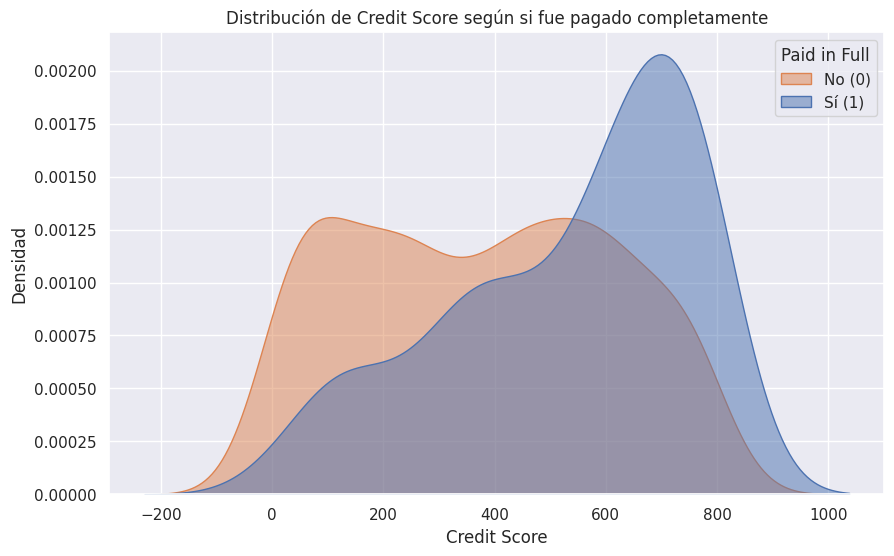

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="credit_score", hue="paid_in_full", fill=True, common_norm=False, alpha=0.5)
plt.title("Distribución de Credit Score según si fue pagado completamente")
plt.xlabel("Credit Score")
plt.ylabel("Densidad")
plt.legend(title="Paid in Full", labels=["No (0)", "Sí (1)"])
plt.grid(True)
plt.show()


In [ ]:
# de los que tienen puntaje alto, cuales pagan?
df[df["credit_score"] > 700]["paid_in_full"].value_counts()

,count
paid_in_full,
1,58
0,45


In [ ]:
print(58 / (58 + 45))
print(45 / (45 + 58))

0.5631067961165048
0.4368932038834951


<Axes: xlabel='credit_score', ylabel='Density'>

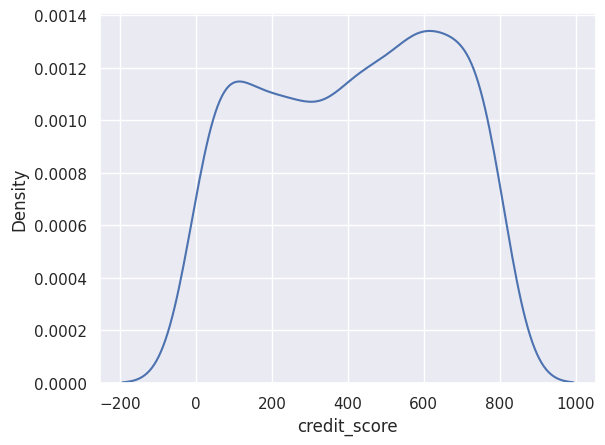

In [ ]:
sns.kdeplot(df["credit_score"])

In [ ]:
df_buenos = df.copy()[df["credit_score"]>=670]

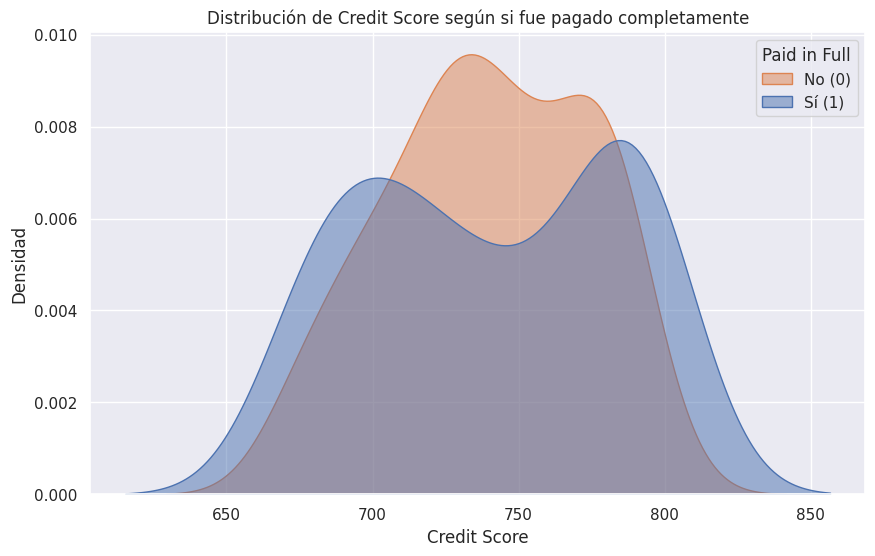

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_buenos, x="credit_score", hue="paid_in_full", fill=True, common_norm=False, alpha=0.5)
plt.title("Distribución de Credit Score según si fue pagado completamente")
plt.xlabel("Credit Score")
plt.ylabel("Densidad")
plt.legend(title="Paid in Full", labels=["No (0)", "Sí (1)"])
plt.grid(True)
plt.show()

In [ ]:
df_a = df_buenos[df_buenos["paid_in_full"] == 1]
df_b = df_buenos[df_buenos["paid_in_full"] == 0]

mean_a = df_buenos[df_buenos["paid_in_full"] == 1].mean()
std_a = df_buenos[df_buenos["paid_in_full"] == 1].std()
mean_b = df_buenos[df_buenos["paid_in_full"] == 0].mean()
std_b = df_buenos[df_buenos["paid_in_full"] == 0].std()

stat = (mean_a - mean_b) / np.sqrt((std_a**2 / df_a.shape[0] + std_b**2 / df_b.shape[0]))

In [ ]:
print("mean_a", mean_a)
print("mean_b", mean_b)
print("==" * 40)
print("std_a", std_a)
print("std_b", std_b)
print("==" * 40)
print("cv_a", std_a / mean_a)
print("cv_b", std_b / mean_b)

mean_a credit_score    739.728571
paid_in_full      1.000000
dtype: float64
mean_b credit_score    740.721311
paid_in_full      0.000000
dtype: float64
std_a credit_score    33.936395
paid_in_full     0.000000
dtype: float64
std_b credit_score    43.640628
paid_in_full     0.000000
dtype: float64
cv_a credit_score    0.045877
paid_in_full    0.000000
dtype: float64
cv_b credit_score    0.058916
paid_in_full         NaN
dtype: float64


In [ ]:
m

In [ ]:
df = df_a.shape[0] + df_b.shape[0] - 2

In [ ]:
stat

,0
credit_score,-0.143779
paid_in_full,inf


In [ ]:
alpha = 0.05

In [ ]:
# en donde cae stat cdf(t(129))

In [ ]:
from scipy.stats import t, ttest_ind

p_val = 2 * (1 - t.cdf(abs(stat), df=df))

In [ ]:
p_val

array([0.88589946, 0.        ])

In [ ]:
pval = ttest_ind(df_a["credit_score"], df_b["credit_score"], alternative="two-sided")

In [ ]:
pval

TtestResult(statistic=np.float64(-0.14625253556429543), pvalue=np.float64(0.8839503357230319), df=np.float64(129.0))